<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-thư-viện" data-toc-modified-id="Import-thư-viện-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import thư viện</a></span></li><li><span><a href="#Thu-thập-dữ-liệu" data-toc-modified-id="Thu-thập-dữ-liệu-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Thu thập dữ liệu</a></span></li><li><span><a href="#Khám-phá,-tiền-xử-lí-dữ-liệu" data-toc-modified-id="Khám-phá,-tiền-xử-lí-dữ-liệu-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Khám phá, tiền xử lí dữ liệu</a></span></li></ul></div>

# Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np

# Thu thập dữ liệu

- Chủ đề của dữ liệu: `Các ứng dụng trên Google Play Store`

Các thông tin về ứng dụng trên Google Play Store có thể thúc đẩy các doanh nghiệp sản xuất các ứng dụng thành công hơn. Ngoài ra, những thông tin này còn có thể giúp các nhà phát triển hiểu thêm và nắm bắt thị trường Android.

- Dữ liệu được lấy từ kaggle: https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv 

- Dữ liệu được thu thập như thế nào?

Dữ liệu được lấy trên Google Play Store

- Lấy dữ liệu file `googleplaystore.csv`

In [2]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# Khám phá, tiền xử lí dữ liệu

- Dữ liệu có bao nhiêu dòng, cột?

In [3]:
nrow = df.shape[0]
ncol = df.shape[1]

In [4]:
print("Dữ liệu có {} dòng".format(nrow))
print("Dữ liệu có {} cột".format(ncol))

Dữ liệu có 10841 dòng
Dữ liệu có 13 cột


- Ý nghĩa của mỗi dòng là gì?`

Mỗi dòng tương ứng với mỗi App với các dữ liệu về tên app, loại app, rating, lượng review, kích cỡ, giá,...

- Dữ liệu có các dòng bị lặp không?

In [5]:
nduplicated = df.duplicated().sum()
print("Dữ liệu có {} dòng bị lặp".format(nduplicated))

Dữ liệu có 483 dòng bị lặp


- Có cột nào bị mất dữ liệu không?

In [6]:
def missing_ratio(s):
    return s.isna().mean() * 100
df.agg([missing_ratio])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
missing_ratio,0.0,0.009224,13.596532,0.0,0.0,0.0,0.009224,0.0,0.0,0.009224,0.0,0.073794,0.018448


- Mô tả về ý nghĩa của mỗi cột

- Mỗi cột có kiểu dữ liệu gì?

In [7]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

`Nhận xét`:
- Cột Size, Install, Price cần chuyển cột này về kiểu dữ liệu dạng số.
- Cột Last Updated cần chuyển cột này về kiểu dữ liệu datetime.

- Với mỗi cột dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

In [9]:
df["Size"] = df["Size"].apply(lambda x: x.replace("M", "e+6").replace("k","e+3").replace("Varies with device","0"))
df["Size"] = pd.to_numeric(df["Size"])

In [10]:
df["Installs"] = df["Installs"].apply(lambda x: x.replace("+", "").replace(",",""))
df["Installs"] = pd.to_numeric(df["Installs"])

In [11]:
df["Price"] = df["Price"].apply(lambda x: x.replace("$", ""))
df["Price"] = pd.to_numeric(df["Price"])

In [12]:
num_col_df = df.select_dtypes(exclude= 'object')
num_col_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9367.000000,1.084100e+04,1.084100e+04,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,1.815069e+07,1.546291e+07,1.027273
std,0.515735,2.927629e+06,2.217006e+07,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,2.600000e+06,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,9.200000e+06,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,2.600000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


- Sự phân bố các cột numeric

<ipython-input-13-2f9b1b529246>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[df.describe().columns].hist(ax = ax)


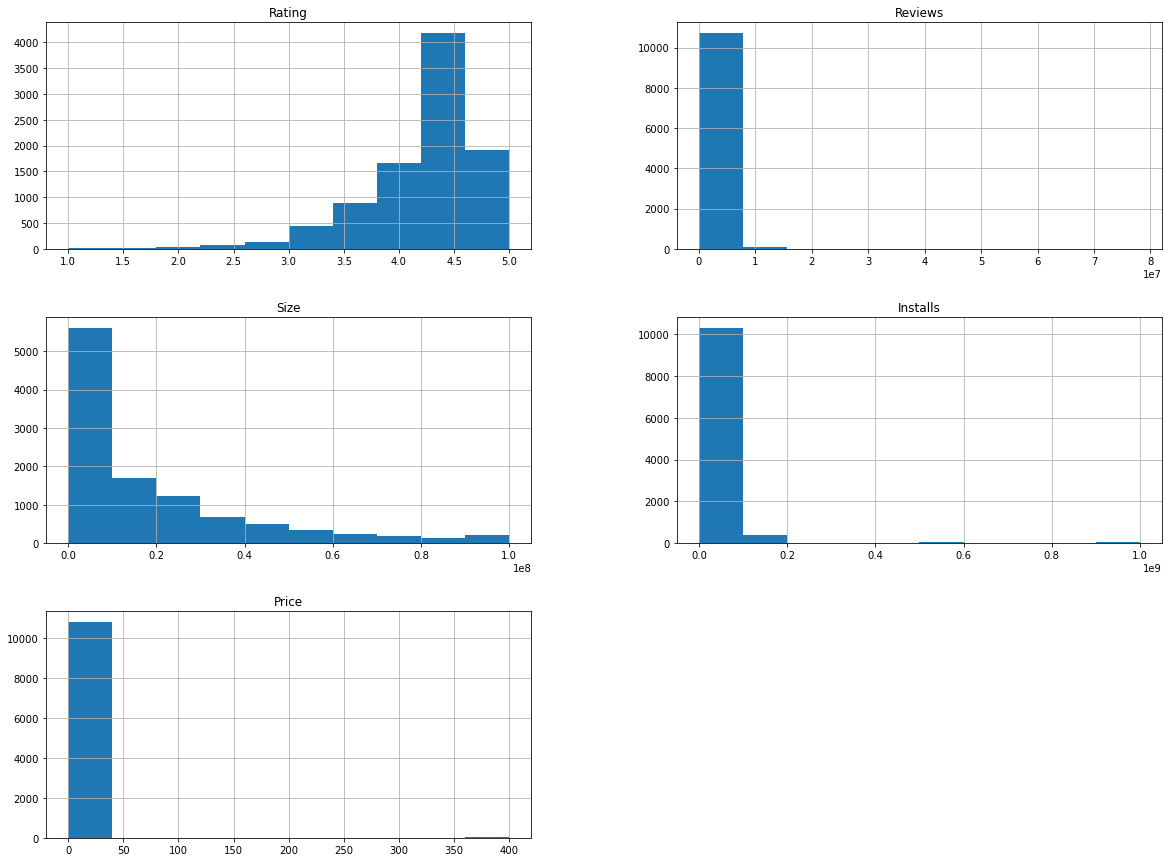

In [13]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df[df.describe().columns].hist(ax = ax)
plt.show()

- Chuyển cột Last Updated sang kiểu datetime

In [14]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"], format = '%d-%b-%y', errors='coerce')

- Với mỗi cột dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

In [15]:
cate_col_df = df.select_dtypes(include= 'object')
cate_col_df.describe()

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
count,10841,10840,10840,10841,10840,10833,10839
unique,9660,33,2,6,119,2783,33
top,ROBLOX,FAMILY,Free,Everyone,Tools,Varies with device,4.1 and up
freq,9,1972,10040,8715,842,1459,2451
